## Codio Activity 8.6: Using Validation to Select the Best Combination of Parameters

This activity focuses on using a train/test split to select the best hyperparameters for a linear regression model complexity.  You will become familiar with scikit-learn's `train_test_split` function to generate a train/test split, and use the results to evaluate the appropriate model complexity.  The datasets used are synthetic so as to allow a comparison with the learned best complexity to that which generated the data.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Three Synthetic Datasets

Below, polynomial functions of different degrees were created and noise is added to generate three basic synthetic datasets.  The relationships are then plotted. They are of varying true complexity -- cubic, quadratic, and quintic (polynomials of degree 5).  Your goal is to use cross validation to determine the appropriate model and examine its mean squared error on a set of validation data. 

In [2]:
df = pd.read_csv('download85 2/data/synthetic_8.6.csv')
df.head()

,x,y1,y2,y3
0,-2.000000,-0.522368,5.698300,3.880352
1,-1.929293,-0.711336,-0.257942,8.643553
2,-1.858586,-4.759917,12.775233,6.116844
3,-1.787879,-10.255472,22.140157,12.493956
4,-1.717172,-3.503845,27.656110,10.335220


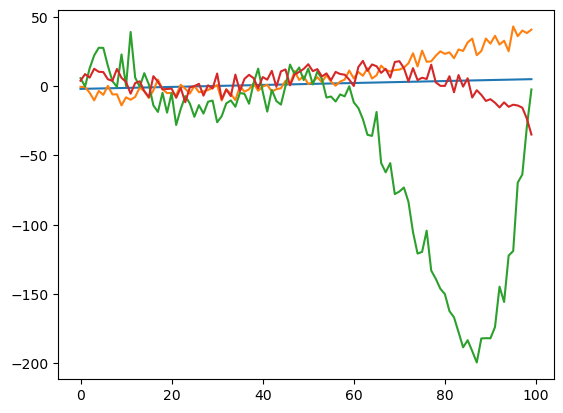

In [9]:
plt.plot(df)

<Axes: >

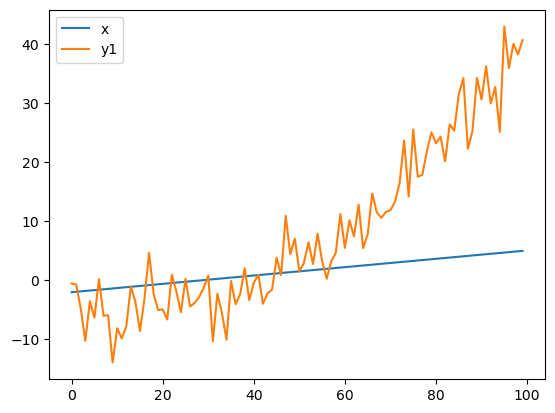

In [10]:
df[['x','y1']].plot()

<Axes: >

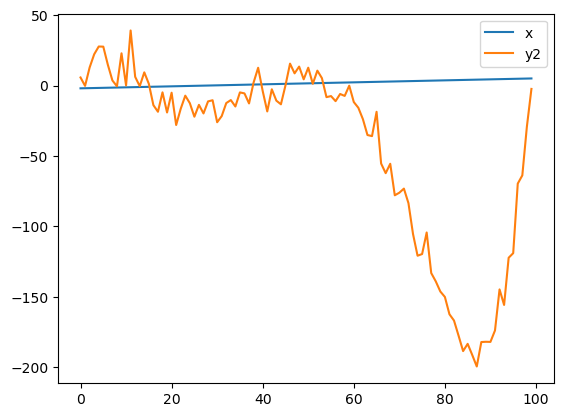

In [11]:
df[['x','y2']].plot()

<Axes: >

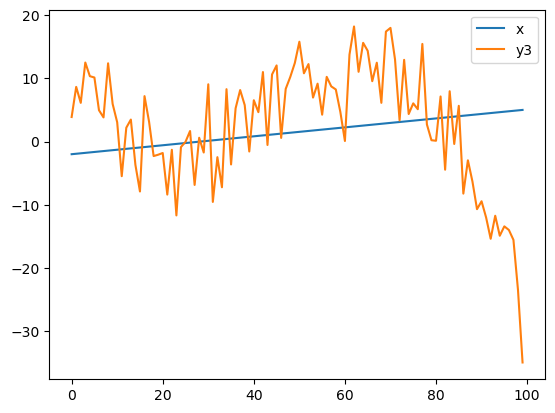

In [12]:
df[['x','y3']].plot()

### Problem 1

#### Creating the Train and Test sets

**5 Points**

Scikit-learn has a built in function called `train_test_split` that accepts one or many arrays and returns a randomized split of the data.  Use the `train_test_split` function to split `x` and `y1` into train and test sets.  Set `random_state = 32` and create a test set using 30% of the data.  Assign your results as array's to `X_train, X_test, y1_train, y1_test` below.  

- In anticipation of using `LinearRegression` estimator, make sure your `X_train` and `X_test` are of shapes (70, 1) and (30, 1) respectively.

In [4]:
X = df[['x']]
y = df['y1']
X_train,X_test,y1_train,y1_test = train_test_split(X, y, random_state = 32,test_size = 0.3)
X_train.head()

,x
91,4.434343
21,-0.515152
61,2.313131
0,-2.000000
31,0.191919


In [14]:
X_train,X_test,y1_train,y1_test = train_test_split(df[['x']],df['y1'], random_state = 32,test_size = 0.3)
X_train.head()

,x
91,4.434343
21,-0.515152
61,2.313131
0,-2.000000
31,0.191919


### Problem 2

Use the `train_test_split` function to create similar splits of `y2` and `y3`.  Use the `random_state = 32` and `test_size` argument as before to assure the same rows of data are used and the same size train and test sets result.  Assign your results as numpy arrays shape (70,) and (30,) respectively to `y2_train`, `y2_test` and `y3_train`, `y3_test` below. 

In [8]:
X_train, X_test, y2_train, y2_test = train_test_split(df[['x']], df['y2'],random_state = 32, test_size = 0.3)
display(X_train.head())
y2_train.head()

,x
91,4.434343
21,-0.515152
61,2.313131
0,-2.000000
31,0.191919


91   -173.744136
21    -28.021552
61    -15.806732
0       5.698300
31    -21.696552
Name: y2, dtype: float64

In [6]:
y3_train, y3_test = train_test_split(df['y3'],random_state = 32, test_size = 0.3)
y3_train.head()

91   -12.007850
21    -8.383127
61    13.738057
0      3.880352
31    -9.543759
Name: y3, dtype: float64

In [10]:
a,b,c,d,e,f,g, h = train_test_split(df["x"], df['y1'], df['y2'], df['y3'], random_state = 32, test_size = 0.3)

In [12]:
display(a.head())
display(g.shape)
g.head()

91    4.434343
21   -0.515152
61    2.313131
0    -2.000000
31    0.191919
Name: x, dtype: float64

(70,)

91   -12.007850
21    -8.383127
61    13.738057
0      3.880352
31    -9.543759
Name: y3, dtype: float64

In [15]:
y2_train,y2_test,y3_train,y3_test = train_test_split(df['y2'],df['y3'],random_state = 32, test_size = 0.3)
y2_train.head()

91   -173.744136
21    -28.021552
61    -15.806732
0       5.698300
31    -21.696552
Name: y2, dtype: float64

### Problem 3

Use a loop to build models of degree 1 through 20 on `X_train` with `y1_train` as the target.  Evaluate the `mean_squared_error` on the training data *and* the testing data and save these values as the lists `train_mses` and `test_mses` respectively.  Determine the model complexity that minimizes the `mean_squared_error` on the **test** data, and assign this as an integer to `best_model_complexity` below.

In [36]:
a.values.reshape(-1,1)

array([[ 4.43434343],
       [-0.51515152],
       [ 2.31313131],
       [-2.        ],
       [ 0.19191919],
       [ 3.3030303 ],
       [ 2.73737374],
       [-0.23232323],
       [-1.01010101],
       [ 1.74747475],
       [-0.86868687],
       [ 1.46464646],
       [-0.7979798 ],
       [-0.72727273],
       [-0.58585859],
       [-0.02020202],
       [ 4.64646465],
       [ 2.94949495],
       [ 0.8989899 ],
       [ 3.86868687],
       [ 2.24242424],
       [ 1.95959596],
       [ 4.92929293],
       [ 3.44444444],
       [ 4.50505051],
       [ 1.60606061],
       [ 2.80808081],
       [ 1.32323232],
       [ 4.08080808],
       [ 1.18181818],
       [ 3.37373737],
       [ 3.7979798 ],
       [ 3.58585859],
       [ 0.61616162],
       [ 3.51515152],
       [ 0.12121212],
       [ 3.16161616],
       [-1.57575758],
       [ 3.09090909],
       [ 2.52525253],
       [ 1.67676768],
       [ 0.05050505],
       [ 3.23232323],
       [ 4.71717172],
       [ 5.        ],
       [ 0

In [40]:

test_df = pd.DataFrame({"Ori_X": a.values, "Ori_y": c.values})
# display(test_df)
temp_model1 = PolynomialFeatures(degree=2, include_bias=False)
temp_model1.fit_transform(a.values.reshape(-1,1))

array([[ 4.43434343e+00,  1.96634017e+01],
       [-5.15151515e-01,  2.65381084e-01],
       [ 2.31313131e+00,  5.35057647e+00],
       [-2.00000000e+00,  4.00000000e+00],
       [ 1.91919192e-01,  3.68329762e-02],
       [ 3.30303030e+00,  1.09100092e+01],
       [ 2.73737374e+00,  7.49321498e+00],
       [-2.32323232e-01,  5.39740843e-02],
       [-1.01010101e+00,  1.02030405e+00],
       [ 1.74747475e+00,  3.05366799e+00],
       [-8.68686869e-01,  7.54616876e-01],
       [ 1.46464646e+00,  2.14518927e+00],
       [-7.97979798e-01,  6.36771758e-01],
       [-7.27272727e-01,  5.28925620e-01],
       [-5.85858586e-01,  3.43230283e-01],
       [-2.02020202e-02,  4.08121620e-04],
       [ 4.64646465e+00,  2.15896337e+01],
       [ 2.94949495e+00,  8.69952046e+00],
       [ 8.98989899e-01,  8.08182838e-01],
       [ 3.86868687e+00,  1.49667381e+01],
       [ 2.24242424e+00,  5.02846648e+00],
       [ 1.95959596e+00,  3.84001632e+00],
       [ 4.92929293e+00,  2.42979288e+01],
       [ 3.

In [41]:
temp_model2 = PolynomialFeatures(degree=2, include_bias=True)
temp_model2.fit_transform(a.values.reshape(-1,1))

array([[ 1.00000000e+00,  4.43434343e+00,  1.96634017e+01],
       [ 1.00000000e+00, -5.15151515e-01,  2.65381084e-01],
       [ 1.00000000e+00,  2.31313131e+00,  5.35057647e+00],
       [ 1.00000000e+00, -2.00000000e+00,  4.00000000e+00],
       [ 1.00000000e+00,  1.91919192e-01,  3.68329762e-02],
       [ 1.00000000e+00,  3.30303030e+00,  1.09100092e+01],
       [ 1.00000000e+00,  2.73737374e+00,  7.49321498e+00],
       [ 1.00000000e+00, -2.32323232e-01,  5.39740843e-02],
       [ 1.00000000e+00, -1.01010101e+00,  1.02030405e+00],
       [ 1.00000000e+00,  1.74747475e+00,  3.05366799e+00],
       [ 1.00000000e+00, -8.68686869e-01,  7.54616876e-01],
       [ 1.00000000e+00,  1.46464646e+00,  2.14518927e+00],
       [ 1.00000000e+00, -7.97979798e-01,  6.36771758e-01],
       [ 1.00000000e+00, -7.27272727e-01,  5.28925620e-01],
       [ 1.00000000e+00, -5.85858586e-01,  3.43230283e-01],
       [ 1.00000000e+00, -2.02020202e-02,  4.08121620e-04],
       [ 1.00000000e+00,  4.64646465e+00

In [18]:
train_mses = []
test_mses = []
for i in range(1,21):
    pipe = Pipeline([('pfeat',PolynomialFeatures(degree = i, include_bias = False)), ('linreg',LinearRegression())])
    pipe.fit(X_train,y1_train)
    train_pred = pipe.predict(X_train)
    test_pred = pipe.predict(X_test)
    train_mses.append(mean_squared_error(train_pred,y1_train))
    test_mses.append(mean_squared_error(test_pred,y1_test))
print(train_mses)
test_mses

[36.78588544670158, 16.901689288923034, 16.792233140921063, 16.75265525198859, 16.51825939695342, 16.34773057992363, 16.34732563666119, 15.478184370042877, 15.41362488939858, 14.686083681497387, 14.530810630303073, 14.397125499213093, 14.29020338579148, 14.279994616199138, 13.900424512073453, 13.418030656401411, 12.813932248801171, 12.767345220344435, 13.133499070261413, 14.034270167848662]


[32.8171722183602,
 6.429420760051614,
 6.778496813459423,
 6.788845115002885,
 6.971695801707449,
 6.760354460952867,
 6.727808544971183,
 6.670479979847718,
 7.020859570052164,
 7.291059476348022,
 7.799829067427354,
 8.100948615970514,
 7.897998287055468,
 8.04523241928214,
 10.70147344062831,
 17.126314228014884,
 31.61742959896897,
 34.52097430361668,
 30.29362828786417,
 20.696754308217976]

In [19]:
best_model_complexity = test_mses.index(min(test_mses)) + 1
best_model_complexity

2

Uncomment the code below to visualize the results of your model fitting.  Note that the data in `y1` were created from a quadratic model originally.

The Complexity that minimized Test Error was: 2


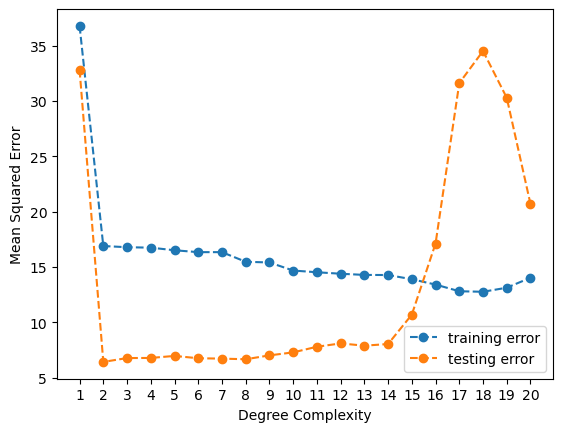

In [20]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

### Problem 4

#### Write a function to determine best model complexity

Now, use what you have learned above to complete the function `simple_cross_validation`.  This function will take in split data, and use the split data to build Linear Regression models of varying complexity, returning the model with the lowest mean squared error on the train set.  

One added piece is the return of the best pipeline -- below comments suggest comparing the mean squared error to the best mean squared error and assigning the pipe to a variable inside the function.  Your function will be tested on the second and third dataset from above. 

In [60]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_mse = np.inf
    best_pipe = None
    for i in range(1,21):
        pipe = Pipeline([('pfeat',PolynomialFeatures(degree = i, include_bias = False)),('linreg',LinearRegression())])
        pipe.fit(X_train,y_train)
        test_mse = mean_squared_error(pipe.predict(X_test),y_test)
        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe
            # print(f"best pipe={best_pipe} at {test_mse} < {best_mse} when {i=}")
            # print(pipe.predict(X_test)[:5])
            # print(y_test.values[:5])
            # print("===========================")
    return best_pipe

In [53]:
simple_cross_validation(X_train, y2_train, X_test, y2_test)

best pipe=Pipeline(steps=[('pfeat', PolynomialFeatures(degree=1, include_bias=False)),
                ('linreg', LinearRegression())]) at 1654.0367196440632 < 1654.0367196440632 when i=1
[   4.87588283  -26.26080334 -110.51301297 -132.49185027  -55.56591973]
[ -16.4988015    12.58586533 -183.22867587  -63.74371444   -7.50755208]
best pipe=Pipeline(steps=[('pfeat', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())]) at 1333.6355369805335 < 1333.6355369805335 when i=2
[   5.82642662  -11.70328177 -119.23588968 -161.72165572  -39.15159602]
[ -16.4988015    12.58586533 -183.22867587  -63.74371444   -7.50755208]
best pipe=Pipeline(steps=[('pfeat', PolynomialFeatures(degree=3, include_bias=False)),
                ('linreg', LinearRegression())]) at 1225.9965125073638 < 1225.9965125073638 when i=3
[  16.44670777   -3.20723604 -122.71961552 -142.94307807  -41.94818294]
[ -16.4988015    12.58586533 -183.22867587  -63.74371444   -7.50755208]
best pipe=Pipe

Pipeline(steps=[('pfeat', PolynomialFeatures(degree=10, include_bias=False)),
                ('linreg', LinearRegression())])

In [61]:
best_model = simple_cross_validation(X_train, y2_train, X_test, y2_test)
best_model.get_params() #should be degree = 10

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=10, include_bias=False)),
  ('linreg', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=10, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 10,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

In [62]:
ans1 = simple_cross_validation(X_train, y1_train, X_test, y1_test)

ans2 = simple_cross_validation(X_train, y3_train, X_test, y3_test)

print(ans1,ans2)

Pipeline(steps=[('pfeat', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())]) Pipeline(steps=[('pfeat', PolynomialFeatures(degree=16, include_bias=False)),
                ('linreg', LinearRegression())])


In [63]:
ans1.get_params()

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(include_bias=False)),
  ('linreg', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'pfeat': PolynomialFeatures(include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 2,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

In [64]:
ans2.get_params()

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=16, include_bias=False)),
  ('linreg', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=16, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 16,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}